In [1]:
print('hello world')

hello world


# Cluster station notebook

## The challenge
Looking only at the weather data (that is, don’t include the latitude/longitude of the
weather station) can you use a clustering algorithm to see if these stations can be clustered
into groups that have “similar” weather? 
Note that you will have multiple weather readings for each station. 
* You could pick the most recent, an average, an extreme, 
* or you could potentially consider all of the points individually and look for clusters in the individual observations. 

__You should try to justify your choice__


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataPath = '../data/weather/'

In [4]:
stationData = pd.read_csv(dataPath+'stationData.csv',index_col=[0,1,2],parse_dates=False)
stationData = stationData[['tmax','tmin','af','rain','sun']]

In [5]:
df = stationData
#display(df.reset_index())
infer_type = lambda x: pd.api.types.infer_dtype(x, skipna=True)
#df.reset_index().apply(pd.to_numeric, errors='ignore')
print(pd.__version__)
#df.reset_index().convert_dtypes()

1.0.3


I'm going to average each month year-by-year. This is because we can see that from a month to month basis, the value changes by quite a bit, which is pretty important data that we don't want to smooth out. 
Taking an average for a given month means that we don't get a skew from lots of data samples (some stations have a lot more historical data than others.)
If we were to take an average yearly value (averageing all the calendar months then averaging over the range of data) then if we're missing a month of data for a given year, we skew the result quite significantly. (If you miss out July, then you're going to get a lot more colder bias for that year, which is wrong. )

I'm not sure how to treat station moves just yet. For now, i'll keep it in since it'd only have a slight bias. 



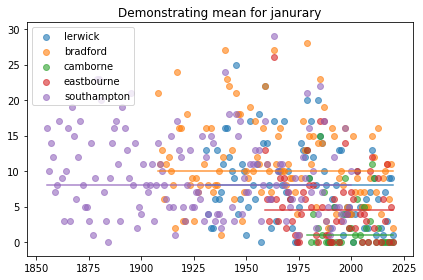

In [6]:
# See
# Getting rid of index makes it a lot easier to slice and manipulate.
df = stationData.reset_index()
#df = 
df_jan = df[df['mm']==1.0]#[df['yyyy']>2010]
import matplotlib.pyplot as plt
for station in list(set(df_jan['station']))[0:5]:
#    #print(y.loc[station,:])
    this_df = df_jan[df_jan['station']==station]
    x= this_df['yyyy']
    y= this_df.set_index('yyyy')
    y = y[['af','rain','sun','tmax','tmin']]
    #print(station)
    if len(y) :
        #print(y)
        plt.scatter(x,y['af'],label=station, alpha=0.6)
        plt.plot(x,[y['af'].median()]*len(x), alpha=0.8)
plt.legend()
plt.title('Demonstrating mean for janurary')
plt.tight_layout()
plt.savefig('../results/meanOverYrs.png')
plt.show()
#    #print(y['af'])

146
146


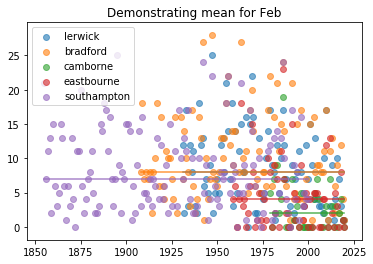

In [7]:
# See
# Getting rid of index makes it a lot easier to slice and manipulate.
df = stationData.reset_index()
#df = 
df_jan = df[df['mm']==2.0]#[df['yyyy']>2010]
print(len(x))
print(len(y))
import matplotlib.pyplot as plt
for station in list(set(df_jan['station']))[0:5]:
#    #print(y.loc[station,:])
    this_df = df_jan[df_jan['station']==station]
    x= this_df['yyyy']
    y= this_df.set_index('yyyy')
    y = y[['af','rain','sun','tmax','tmin']]
    #print(station)
    if len(y) :
        #print(y)
        plt.scatter(x,y['af'],label=station, alpha=0.6)
        plt.plot(x,[y['af'].median()]*len(x), alpha=0.8)
plt.legend()
plt.title('Demonstrating mean for Feb')
plt.show()
#    #print(y['af'])


In [8]:
#cols = (stationData.columns).values
#print(cols)
#idx = pd.IndexSlice
##print(stationData[stationData.index.isin([1.0,2.0],level=2)])
##[stationData.index.isin([1.0],level=2)]
##print(stationData[stationData.index.isin(['yeovilton'],level=0)])
#df = stationData.reset_index()
#sdict={}
#dictList=[]
#for station in set(df['station']):
#    #print(station)
#    sdf=stationData[stationData.index.isin([station],level=0)]
#    mdict={}
#    for month in range (1,12+1):
#        month = float(month) # to replicate dataframe
#        #print(month)
#        mdf = sdf[sdf.index.isin([month], level=2)]
#        #print(mdf.median().to_dict())
#        # I don't really understand how to construct dataframe other than this.. 
#        mdict = mdf.median().to_dict()
#        mdict['mm'] = month
#        mdict['station'] = station
#        dictList.append(mdict)
#
#    #sdict[station] = mdict
#
#avgDict = pd.DataFrame.from_dict(dictList)
#avgDict.set_index(['station','mm'],inplace=True)
##
## display(avgDict)
#print(avgDict.index.get_level_values(0)[0])


#firstStation = avgDict[avgDict.index.isin([avgDict.index.get_level_values(0)[0]],level=0)]
#fig, ax = plt.subplots(len(avgDict.columns)+2,figsize=(8,20),sharex=True,sharey=True)
##display(avgDict) # columns
##display(avgDict/avgDict.std()) # columns
##standardize
#avgDict.reset_index(inplace=True)
#avgDict.set_index(['station'],inplace=True)
##standardize
#avgDict = avgDict/avgDict.std()
##display(avgDict)
#from sklearn.cluster import KMeans
#kmeans = KMeans()
#kmeans.fit(avgDict).score(avgDict)
##avgDict['labels'] = kmeans.labels_
#display(avgDict)
#print(avgDict.columns.values)
#for f_i,feature in enumerate(avgDict.columns.values):
#    print(feature)
#    for station in list(set(df['station'])):
#        #print(station)
#        station_df = avgDict[avgDict.index.isin([station],level=0)]
#        
#        #display(station_df)
#        #print(station_df[feature].head())
#        #print(station_df[feature].values)
#        #ax[f_i].plot(station_df.index.get_level_values(1),station_df[feature], label=station )
#        #print('{} {} '.format(station, feature))
#        #print(station_df[feature].values)
#        ax[f_i].plot(station_df['mm'],station_df[feature], label=station, c=kmeans.labels_.astype(float) )
#        ax[f_i].title.set_text(feature)
        #ax[f_i].plot(station_df.index.get_level_values(1),[station_df[feature].mean()]*len(station_df.index.get_level_values(1)), label=station )
#fig.show()
#        print(df[df['station']==station][df['mm']==month][cols])

['tmax' 'tmin' 'af' 'rain' 'sun']


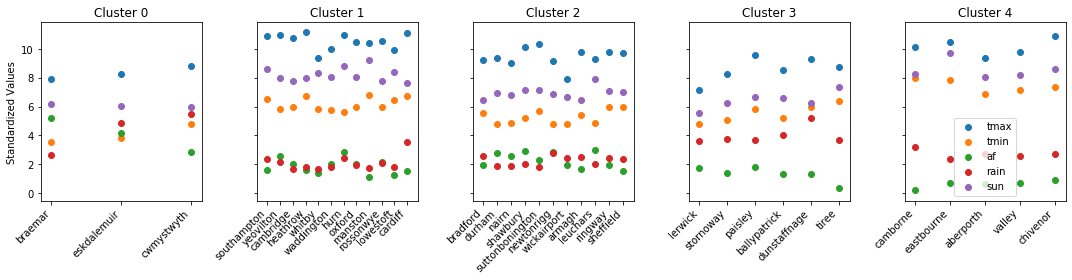

In [30]:
cols = (stationData.columns).values
print(cols)
idx = pd.IndexSlice
#print(stationData[stationData.index.isin([1.0,2.0],level=2)])
#[stationData.index.isin([1.0],level=2)]
#print(stationData[stationData.index.isin(['yeovilton'],level=0)])
df = stationData.reset_index()
sdict={}
dictList=[]
for station in set(df['station']):
    #print(station)
    sdf=stationData[stationData.index.isin([station],level=0)]
    mdict={}
    mdictList=[]
    for month in range (1,12+1):
        month = float(month) # to replicate dataframe
        #print(month)
        mdf = sdf[sdf.index.isin([month], level=2)]
        #print(mdf.median().to_dict())
        # I don't really understand how to construct dataframe other than this.. 
        mdict = mdf.median().to_dict()
        mdict['mm'] = month
        mdict['station'] = station
        mdictList.append(mdict)
    stationavg = pd.DataFrame.from_dict(mdictList)
    stationavg.set_index(['station','mm'],inplace=True)
    #print(stationavg)
    #print(stationavg.mean().to_dict())
    stationavg = stationavg.mean().to_dict()
    stationavg['station'] = station
    dictList.append(stationavg)
avgDict = pd.DataFrame.from_dict(dictList).set_index('station')
    #sdict[station] = mdict

#avgDict = pd.DataFrame.from_dict(dictList)
#avgDict.set_index(['station','mm'],inplace=True)
##
## display(avgDict)
#print(avgDict.index.get_level_values(0)[0])
#
#
#firstStation = avgDict[avgDict.index.isin(#[avgDict.index.get_level_values(0)[0]],level=0)]
#fig, ax = plt.subplots(len(avgDict.columns)+1,figsize=(8,20),#sharex=True,sharey=True)
#display(avgDict) # columns
#display(avgDict/avgDict.std()) # columns
##standardize
#avgDict.reset_index(inplace=True)
#avgDict.set_index(['station'],inplace=True)
avgDict = avgDict/avgDict.std()
##display(avgDict)
from sklearn.cluster import KMeans
clusters = 5
kmeans = KMeans(n_clusters=clusters)
kmeans.fit(avgDict).score(avgDict)
avgDict['labels'] = kmeans.labels_
#display(avgDict)
fig, ax = plt.subplots(1,clusters, figsize=(15,4),sharey=True)

ax[0].set(ylabel='Standardized Values')
for label in range(0,clusters):
    thedf = avgDict[avgDict['labels']==label]
    for f_i,feature in enumerate(avgDict.drop('labels', 1).columns.values):
        ax[label].scatter(thedf.index,thedf[feature], label=feature)
        
        for xlabel in ax[label].get_xticklabels():
            xlabel.set_ha("right")
            xlabel.set_rotation(45)
        ax[label].set_title('Cluster {}'.format(label))
plt.tight_layout()
plt.legend()
plt.savefig('../results/clusterHoriz.png')
#plt.scatter(sumD.index,sumD, c=kmeans.labels_)
#for f_i,feature in enumerate(avgDict.columns.values[0]):
#    print(feature)
#    for station in list(set(df['station'])):
#
#        station_df = avgDict[avgDict.index.isin([station],level=0)]
#        
#        #display(station_df)
#        #print(station_df[feature].head())
#        #print(station_df[feature].values)
#        #ax[f_i].plot(station_df.index.get_level_values(1),#station_df[feature], label=station )
#        ax[f_i].plot(station_df['mm'],station_df[feature], #label=station, c=kmeans.labels_ )
#        ax[f_i].title.set_text(feature)
#        #ax[f_i].plot(station_df.index.get_level_values(1),#[station_df[feature].mean()]*len(station_df.index.get_level_values#(1)), label=station )
#fig.show()
##        print(df[df['station']==station][df['mm']==month][cols])

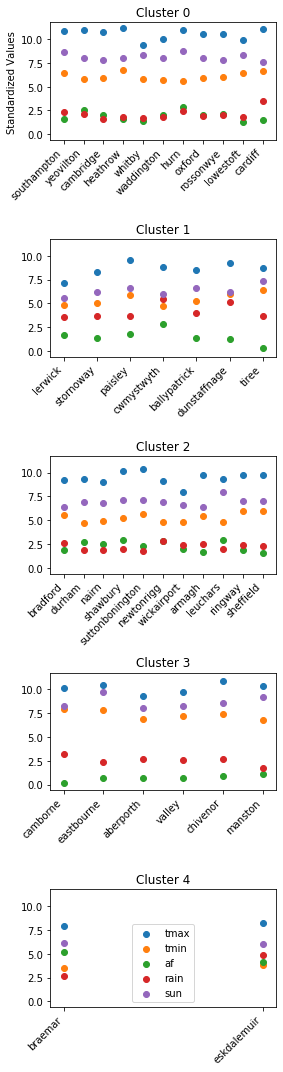

In [29]:

fig, ax = plt.subplots(clusters,1, figsize=(4,15),sharey=True)

ax[0].set(ylabel='Standardized Values')
for label in range(0,clusters):
    thedf = avgDict[avgDict['labels']==label]
    #print(thedf.describe())
    for f_i,feature in enumerate(avgDict.drop('labels', 1).columns.values):
        ax[label].scatter(thedf.index,thedf[feature], label=feature)
        
        for xlabel in ax[label].get_xticklabels():
            xlabel.set_ha("right")
            xlabel.set_rotation(45)
        ax[label].set_title('Cluster {}'.format(label))
plt.tight_layout()
plt.legend()
plt.savefig('../results/clusterVert.png')

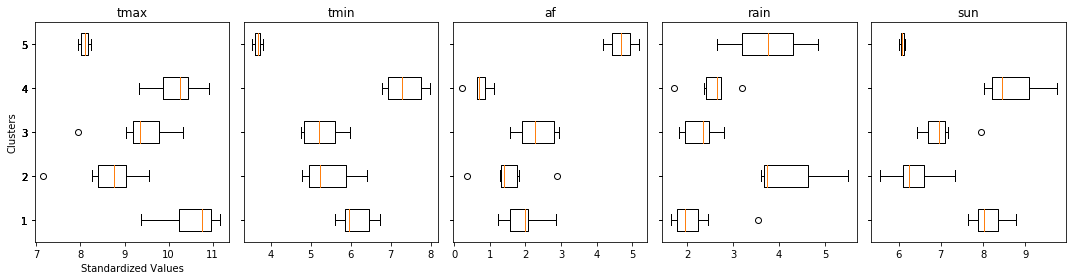

In [28]:
cols = avgDict.drop('labels', 1).columns.values
fig, ax = plt.subplots(1,len(cols), figsize=(15,4),sharey=True)#,sharex=True)

ax[0].set(ylabel='Clusters')

ax[0].set(xlabel='Standardized Values')
#for label in range(0,clusters):
#    thedf = avgDict[avgDict['labels']==label]
#    print(thedf.describe())
for f_i,feature in enumerate(avgDict.drop('labels', 1).columns.values):
    #print(avgDict[feature])
    [avgDict[avgDict['labels'] == label][feature] for label in range(0,clusters)]
    ax[f_i].boxplot([avgDict[avgDict['labels'] == label][feature] for label in range(0,clusters)],vert=False)
    #ax[f_i].xlabel()
    #for xlabel in ax[f_i].get_yticklabels():
    #    xlabel.set_ha("right")
    #    xlabel.set_rotation(45)
    ax[f_i].set_title('{}'.format(feature))
plt.tight_layout()
plt.savefig('../results/clusterBoxPlot.png')
plt.show()